In [1]:
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import animation
import datetime
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

%matplotlib inline

In [2]:
os.chdir('D:/repo/AlgoUtil') # Use your own path
from common import get_data_path
from get_data.static import RESTfulProcessor
from matplotlib.animation import FuncAnimation

In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:
resp = RESTfulProcessor(verbose=False)
df_train, df_test = resp.process_data()

2021-10-31 22:10:40,689 INFO: Found stored D:\repo\AlgoUtil/data/ticker.pkl data, start loading
2021-10-31 22:10:40,693 INFO: Loading is done
2021-10-31 22:10:40,694 INFO: Found stored D:\repo\AlgoUtil/data/ticker_detail.pkl data, start loading
2021-10-31 22:10:40,742 INFO: Loading is done
2021-10-31 22:10:40,743 INFO: Found stored D:\repo\AlgoUtil/data/ticker_price.pkl data, start loading
2021-10-31 22:10:40,972 INFO: Loading is done


# Sine Wave Function Example

2021-10-31 22:10:46,818 WARNING: MovieWriter imagemagick unavailable; using Pillow instead.
2021-10-31 22:10:46,819 INFO: Animation.save using <class 'matplotlib.animation.PillowWriter'>


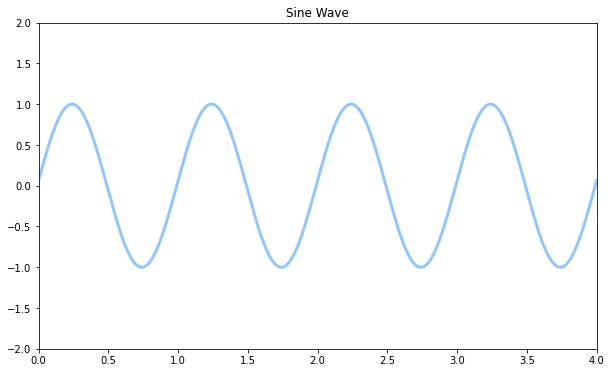

In [5]:
plt.style.use('seaborn-pastel')
gif_path = get_data_path() + 'data_explore/sine_wave.gif'
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_xlim((0, 4))
ax.set_ylim((-2, 2))
ax.set_title('Sine Wave')
line, = ax.plot([], [], lw=3)

def init():
    line.set_data([], [])
    return line,
def animate(i):
    x = np.linspace(0, 4, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

anim = FuncAnimation(fig, animate, init_func=init, frames=200, interval=20, blit=True)
anim.save(gif_path, writer='imagemagick')

# Practical Example

In [6]:
class AnimatedScatter:
    """An animated scatter plot using matplotlib.animations.FuncAnimation."""
    save_folder = get_data_path() + 'data_explore/'

    def __init__(self, df, filename: str, frame_column: str, x_col: str, y_col: str, c_col: str, axis):
        self.data = df

        self.save_path = self.save_folder + filename

        self.frame_column = frame_column
        self.frames = np.sort(list(df[frame_column].unique()))
        self._frame_id = 0  # start from 1 because all values are missing in the first date
        self.handles = []

        self.fig, self.ax = plt.subplots()
        self.ax.axis(axis)
        self.x_col = x_col
        self.y_col = y_col
        self.c_col = c_col

        self.colors = sns.color_palette('Paired', n_colors=self.data[self.c_col].nunique())
        self.ani = None
        self.scat = None
        self.prev_scat = None

    def get_frame_id(self):
        frame_id = self._frame_id
        self._frame_id += 1

        return frame_id

    def update(self, i):
        """Update the scatter plot."""
        frame_id = self.get_frame_id()
        print('start {}th frame'.format(frame_id))

        new_alphas = []
        for s in self.handles:
            new_alpha = s.get_alpha() * 0.6
            new_alphas.append(new_alpha)
            if new_alpha > 0.1:
                s.set_alpha(new_alpha)
                s.set_sizes([15])
            else:
                s.remove()

        if len(self.handles) > 0:
            n = len(new_alphas)
            self.handles = [self.handles[i] for i in range(n) if new_alphas[i] > 0.1]

        self.ax.set_title('{}'.format(self.frames[frame_id]))

        df_tmp_all = self.data[self.data[self.frame_column] == self.frames[frame_id]].copy()
        grouped = df_tmp_all.groupby([self.c_col])
        dict_scat = {}
        for l, df_tmp in grouped:
            x = df_tmp[self.x_col].values
            y = df_tmp[self.y_col].values
            c = pd.Series(self.colors, index=df_tmp_all[self.c_col])
            scat = self.ax.scatter(x, y, color=c[l], label=l, alpha=1)
            dict_scat[l] = scat
            self.handles.append(scat)

        self.ax.legend(dict_scat.values(), dict_scat.keys())

        print('{}th frame is done'.format(frame_id))

    def run(self):
        self.ani = animation.FuncAnimation(
            self.fig,
            self.update,
            frames=len(self.frames) - 1,  # remove the frame in setup phase
            interval=500,  # change frame every 0.5 seconds
            repeat=False
        )
        self.ani.save(self.save_path, writer='imagemagick')


In [ ]:
resp = RESTfulProcessor(verbose=False)
df_train, _ = resp.process_data()

tickers = ['AAPL', 'MSFT', 'AMZN', 'FB', 'GOOG', 'TSLA', 'NVDA']
df_sample = df_train.loc[df_train['ticker'].isin(tickers), ['ticker', 'date', 'open_pct_chg', 'volume_pct_chg']]
df_sample['ticker'] = pd.Categorical(df_sample['ticker'])
df_sample.dropna(inplace=True)
ani_scat = AnimatedScatter(
    df=df_sample,
    filename='test.gif',
    frame_column='date',
    x_col='volume_pct_chg',
    y_col='open_pct_chg',
    c_col='ticker',
    axis=[-50, 50, -10, 10]
)
ani_scat.run()

2021-10-31 22:10:56,341 INFO: Found stored D:\repo\AlgoUtil/data/ticker.pkl data, start loading
2021-10-31 22:10:56,344 INFO: Loading is done
2021-10-31 22:10:56,345 INFO: Found stored D:\repo\AlgoUtil/data/ticker_detail.pkl data, start loading
2021-10-31 22:10:56,380 INFO: Loading is done
2021-10-31 22:10:56,381 INFO: Found stored D:\repo\AlgoUtil/data/ticker_price.pkl data, start loading
2021-10-31 22:10:56,591 INFO: Loading is done
2021-10-31 22:11:02,415 WARNING: MovieWriter imagemagick unavailable; using Pillow instead.
2021-10-31 22:11:02,415 INFO: Animation.save using <class 'matplotlib.animation.PillowWriter'>


start 0th frame
0th frame is done
start 1th frame
1th frame is done
start 2th frame
2th frame is done
start 3th frame
3th frame is done
start 4th frame
4th frame is done
start 5th frame
5th frame is done
start 6th frame
6th frame is done
start 7th frame
7th frame is done
start 8th frame
8th frame is done
start 9th frame
9th frame is done
start 10th frame
10th frame is done
start 11th frame
11th frame is done
start 12th frame
12th frame is done
start 13th frame
13th frame is done
start 14th frame
14th frame is done
start 15th frame
15th frame is done
start 16th frame
16th frame is done
start 17th frame
17th frame is done
start 18th frame
18th frame is done
start 19th frame
19th frame is done
start 20th frame
20th frame is done
start 21th frame
21th frame is done
start 22th frame
22th frame is done
start 23th frame
23th frame is done
start 24th frame
24th frame is done
start 25th frame
25th frame is done
start 26th frame
26th frame is done
start 27th frame
27th frame is done
start 28th f